In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# here you can use your own API key
# to get one, go to https://console.developers.google.com/
# and create a new project and enable the Youtube Data API v3
# then create an API key and use it here
API_KEY = 'Here you use your API key'

# function to get the most popular videos 
def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # create an empty list for adding the videos data
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US', # hewe you can change the region code to any country you want  
        maxResults=50
    )

    # paginate through the results if max_results > 100
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'yt_data.csv'
    save_to_csv(trending_videos, filename)

if __name__ == '__main__':
    main()

In [28]:
df = pd.read_csv(r"C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv")

df.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3695350,136355,0,0,23592
2,kmXkr7I8gYo,Tank Davis vs Roach FIGHT HIGHLIGHTS | Premier...,"In a back and forth battle At Barclays Center,...",2025-03-02T05:45:58Z,UC2Ss8mXyksW2SQfhhUpgR2g,Sports On Prime,17,[],PT6M10S,hd,False,505161,4137,0,0,2392
3,fpBqWFhefNA,Gervonta Davis FULL Post Fight Press Conferenc...,In this video we hear from Gervonta Davis afte...,2025-03-02T07:56:54Z,UCwdVyruxCCqMR4DtPLhtwlg,Fight Hub TV,17,"['boxing', 'fight hub', 'fight hub tv', 'fight...",PT14M15S,hd,False,576349,7553,0,0,4290
4,1mtJvsfAtF0,Sabrina Carpenter - Espresso/Bed Chem (Live at...,Sabrina Carpenter performs “Espresso” & “Bed C...,2025-03-02T02:30:47Z,UC4mYKePIas5YgGfYZ2J2OxQ,SabrinaCarpenterVEVO,10,"['Sabrina Carpenter', 'Island Records', 'Pop']",PT5M13S,hd,True,1529450,90686,0,0,4110


In [29]:
top_10_viewed = df.pivot_table(index=['title', 'channel_title'], values='view_count', aggfunc='sum').sort_values('view_count', ascending=False).head(10)
top_10_viewed = top_10_viewed.reset_index()
top_10_viewed['view_count'] = pd.to_numeric(top_10_viewed['view_count'])

top_10_viewed

,title,channel_title,view_count
0,I Spent 100 Hours Inside The Pyramids!,MrBeast,149932178
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,NFL,93689528
2,100 People Trapped Inside 100 Circles For $500...,MrBeast,35957561
3,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,OfficialGDRAGON,27410660
4,"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,23043665
5,"Karan Aujla, OneRepublic, Disha Patani, Ikky -...",Karan Aujla,22287709
6,A Minecraft Movie | Final Trailer,Warner Bros.,20447774
7,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Wall Poster Cinema,20182707
8,G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,17591163
9,IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,15008085


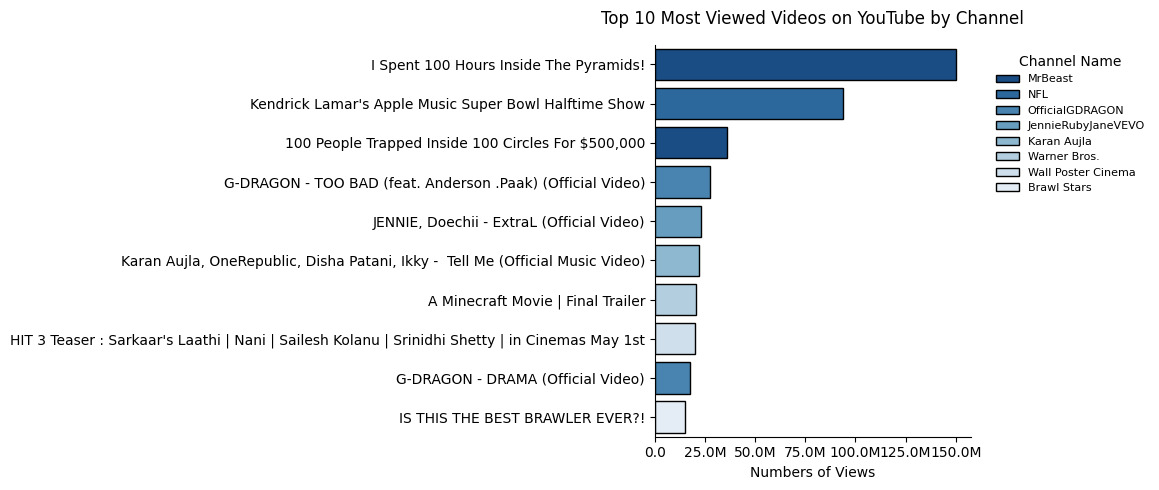

In [30]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_viewed, 
            x='view_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Viewed Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**

1. **MrBeast Dominates Viewer Engagement**:  
   - MrBeast holds **two of the top three most-viewed videos**, with "I Spent 100 Hours Inside The Pyramids!" securing the **#1 spot** (~150M views) and another challenge-based video ranking third (~40M views). This highlights the effectiveness of high-concept, immersive challenges in driving massive engagement.

2. **Live Events & Sports Content Attract Massive Audiences**:  
   - The NFL’s Super Bowl Halftime Show featuring Kendrick Lamar ranks **second** (~90M views), underscoring the power of live-event coverage and partnerships with popular artists to capture viral attention.

3. **K-Pop and Music Content Reign Supreme**:  
   - Multiple entries from **G-DRAGON** (OfficialGDRAGON channel) and **Jennie** (JennieRubyJaneVEVO) demonstrate the global reach of K-pop and music videos. Official releases remain a cornerstone of YouTube’s top content.

4. **Diverse Content Types Compete Effectively**:  
   - Beyond challenges and music, **gaming** (Brawl Stars), **movie trailers** (Warner Bros.’ *Minecraft Movie*), and **Hindi cinema** (Karan Aujla) showcase YouTube’s broad appeal. This diversity indicates opportunities for niche creators to break into mainstream viewership.


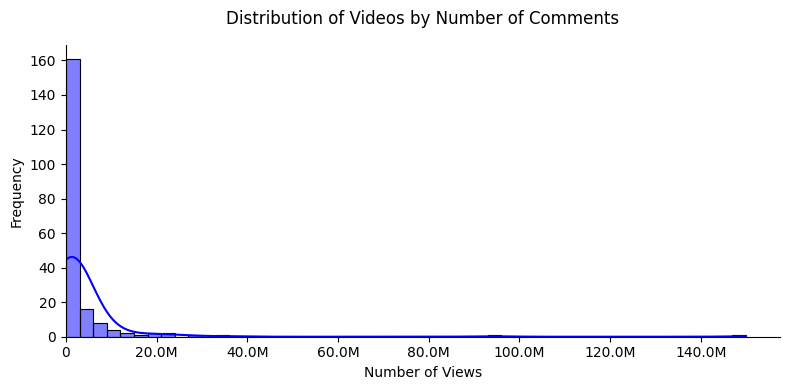

In [31]:
# videos distribution by views
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='view_count',
             bins=50,
             kde=True,
             edgecolor='k',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments', pad=15)
plt.ylabel('Frequency')
plt.xlabel('Number of Views')

plt.grid(False)
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Highly Skewed Engagement Distribution**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos garner the majority of views**. The first bar (likely representing videos with <5M views) dominates (~160 videos), while views plummet rapidly for higher-view ranges. This aligns with the "long-tail" phenomenon common in social media, where **most content receives minimal engagement**, and only outliers achieve viral success.  

2. **Viral Content Dominates Views**:  
   - A handful of videos (e.g., those in the 100M+ range) account for disproportionately high viewership. This echoes the earlier analysis of MrBeast and NFL content, reinforcing that **viral, high-concept videos** capture the lion’s share of attention.  


In [32]:
top_commented_videos = df.pivot_table(index=['title', 'channel_title'], values='comment_count', aggfunc='sum').sort_values('comment_count', ascending=False).head(10)

top_commented_videos

,,comment_count
title,channel_title,
Kendrick Lamar's Apple Music Super Bowl Halftime Show,NFL,175291
I Spent 100 Hours Inside The Pyramids!,MrBeast,92370
"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,86698
LISA - FUTW (Vixi Solo Version) (Official Music Video),LLOUD Official,73738
IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,53967
Hearts2Hearts 하츠투하츠 'The Chase' MV,SMTOWN,44811
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video),OfficialGDRAGON,40134
"100 People Trapped Inside 100 Circles For $500,000",MrBeast,33472
G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,30922


**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate like activity**. Most videos (~150) receive fewer than 50K likes, while a handful (e.g., MrBeast’s pyramid challenge) garner over 4M likes. This mirrors the "long-tail" trend observed in views and comments, emphasizing that **only outliers achieve massive engagement**.  

2. **Algorithmic Amplification of Viral Content**:  
   - The steep drop-off post-100K likes highlights YouTube’s algorithmic bias toward promoting content that gains initial traction. Videos with rapid early engagement enter a feedback loop, receiving more visibility and likes, while others stagnate.  

3. **Contrast Between Top-Liked and Average Videos**:  
   - While MrBeast’s challenge video dominates likes (~4.5M), most videos fail to surpass 50K. This underscores the **rarity of viral success** and the challenge for creators to break through the noise.  

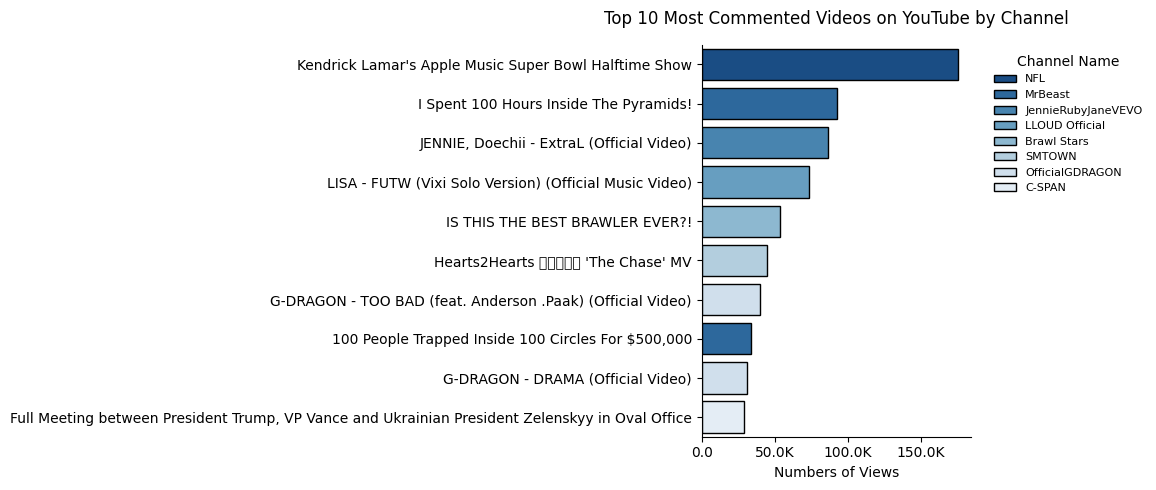

In [33]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_commented_videos, 
            x='comment_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Commented Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Live Events & Controversial Content Drive Discussion**:  
   - **NFL’s Super Bowl Halftime Show** tops the chart (~160K comments), highlighting how live events and performances generate intense viewer engagement. Similarly, **C-SPAN’s political meeting** (Trump-Zelenskyy) sparks heated debate, underscoring the link between controversy and comment activity.  

2. **Music Videos Foster Community Interaction**:  
   - K-pop artists dominate the list (**Jennie**, **Lisa**, **G-DRON**) with ~80–90K comments each. Fans engage in theories, reactions, and global coordination, making music videos hubs for passionate discourse.  

3. **Gaming Communities Thrive on Engagement**:  
   - **Brawl Stars’ gameplay video** ("IS THIS THE BEST BRAWLER EVER?") garners ~50K comments, reflecting the gaming community’s tendency to analyze strategies, share tips, and debate character mechanics.  

4. **MrBeast’s Challenge-Based Content Balances Views and Comments**:  
   - While his pyramid video ranked #1 in views, it drops to #2 in comments (~100K). This suggests challenges attract massive audiences but may not sustain prolonged discussion compared to live events or music.  

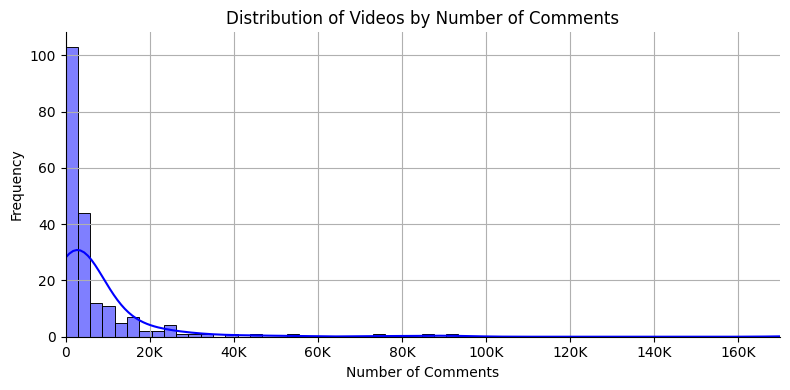

In [34]:
# videos distribution by comment
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='comment_count',
             bins=60,
             kde=True,
             palette='Blues_r',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments')
plt.ylabel('Frequency')
plt.xlabel('Number of Comments')

plt.grid(True)
plt.xlim(0, 170000)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate comment activity**. Most videos (~100) receive fewer than 5K comments, while a handful (e.g., the NFL Super Bowl Halftime Show) garner over 150K comments. This mirrors the "long-tail" trend observed in views, emphasizing that **only outliers achieve massive engagement**.  

2. **Viral Content Drives Commentary**:  
   - The steep drop-off post-20K comments highlights that **most videos fail to spark meaningful discussion**. Exceptions (e.g., live events, controversies) break through due to their emotional or cultural relevance, aligning with the earlier analysis of top-commented videos.  

3. **Contrast with Views Distribution**:  
   - While high-view videos (e.g., MrBeast’s challenges) may not always correlate with high comments, **content that provokes debate** (e.g., political meetings, live performances) tends to dominate both metrics. This suggests **contextual relevance** is critical for sustained engagement.